 ## HUMBIO51 Assignment Week 5

<ol>
 <li> <a href=#wc>Use unix commands to count the number of lines in a file. </a></li>
 <li> <a href=#GORilla>Use GORilla to perform GO-term enrichment analysis. </a></li>
 <li> <a href=#GeneExpressionIntro>Visualize gene expression variation across cell types and individuals from the GTEx project</a></li>
 <li><a href=#RNASeqDataFormat>Use unix "head" and "cat" commands to merge and split files.</a></li>
 <li><a href=#RNASeqDataFormat>Construct contingency tables to compute GO-term enrichment likelihoods.</a></li>
 <li><a href=#RNASeqDataFormat>Write a Python expression for Fisher's exact test.</a></li>
 <li><a href=#RNASeqDataFormat>Apply Fisher's exact test to compute the probability of observing a particular contingency table.</a></li>


In [1]:
#Change your working directory to Week_5
import os
os.chdir('Week_5')

## QUESTION 1


### QUESTION 1a 
We have downloaded the list of genes associated with GO terms [GO:0006915](http://amigo.geneontology.org/amigo/term/GO:0006915) and [GO:0008380](http://amigo.geneontology.org/amigo/term/GO:0008380). 
These are located in the Week_5 directory: 

How many genes are in each list? 


ANSWER: 

Number of genes associated with GO term "GO:0006915": 

Number of genes associated with GO term "GO:0008380":


In [2]:
!wc -l GO_0006915.txt

1987 GO_0006915.txt


In [3]:
!wc -l GO_0008380.txt

427 GO_0008380.txt


### QUESTION 1b

Use the [GORilla tool](http://cbl-gorilla.cs.technion.ac.il/) to identify Biological Process terms that are significantly enriched for each gene set.
* The background gene set is the set of all human genes, stored in the file **Week_5/hg19.names.txt**. 
* We consider a GO term to be significantly enriched if the FDR q-value is less than 0.05 

What description matches the GO term "GO:0006915"? 
ANSWER:apoptotic process


What is the corrected p-value (FDR q-value) for this GO term? 

ANSWER: 0e0



What description matches the GO term "GO:0008380"? 

ANSWER: RNA splicing	


What is the corrected p-value (FDR q-value) for this GO term? 

ANSWER: 0e0


### QUESTION 1c 
What would happen to the p-values in the GO term enrichment analysis if only half of the genes in the gene set were available? Let's do this experiment and find out! 

Use unix commands to print the first half of **GO_0008380.txt**. Save the genes to files called: 
**GO_0008380_half.txt** 

In [4]:
##YOUR CODE HERE 
!wc -l GO_0008380.txt
427/2

427 GO_0008380.txt


213.5

In [5]:
!head -n 213 GO_0008380.txt > GO_0008380_half.txt

We can re-run GORilla analysis for GO_0006915_half.txt to examine how our results have changed. However, let's instead find the enriched set of GO terms programmatically using a Python script(you will find that this approach is less tedious than uploading multiple lists of genes to GORilla for analysis in the browser. 

To perform the analysis programatically, we will use the [goatools](https://github.com/tanghaibao/goatools) Python library. The goatools library provides a script called **find_enrichments.py** to find enriched GO terms in a list of genes. Let's examine the syntax of this script: 

In [6]:
from goatools import * 

In [7]:
!find_enrichment.py

usage: 
python find_enrichment.py study.file population.file gene-association.file

This program returns P-values for functional enrichment in a cluster of study
genes using Fisher's exact test, and corrected for multiple testing (including
Bonferroni, Holm, Sidak, and false discovery rate).

About significance cutoff:
--alpha: test-wise alpha; for each GO term, what significance level to apply
        (most often you don't need to change this other than 0.05 or 0.01)
--pval: experiment-wise alpha; for the entire experiment, what significance
        level to apply after Bonferroni correction

       [-h] [--alpha ALPHA] [--pval PVAL] [--pval_field PVAL_FIELD]
       [--outfile OUTFILE] [--sections SECTIONS]
       [--outfile_detail OUTFILE_DETAIL] [--compare] [--ratio RATIO]
       [--indent] [--obo OBO] [--no_propagate_counts] [--method METHOD]
       [--pvalcalc PVALCALC] [--min_overlap MIN_OVERLAP] [--goslim GOSLIM]
       filenames filenames filenames

positional arguments:
  file

There are 3 required arguments for the script: 
    
    1. The dataset (list of genes in GO_0008380.txt) 
    2. The background (list of genes in hg19.names.txt) 
    3. A file that associates gene names to GO terms (hg19.assocs). We generated this file in advance -- It contains gene names in column 1 and GO terms associated with this gene in column 2. 

There are also 2 optional inputs to the script that we will find useful: 
    1. --outfile
    The output file to save enriched GO terms 
    2. --pval_field=fdr_bh 
    This argument indicates that the script should only return GO Terms enriched with false discovery rate < 0.05. 
    
Use this information to execute the script **find_enrichment.py** and store the output in a file **Week_5/GO_0008380_half.enrichments.tsv**

In [8]:
## YOUR CODE HERE ## 

! find_enrichment.py GO_0008380_half.txt hg19.names.txt hg19.assocs --outfile GO_0008380_half.enrichments.tsv --pval_field=fdr_bh

go-basic.obo: fmt(1.2) rel(2018-09-19) 47,343 GO Terms
Study: 213 vs. Population 58581

Propagating term counts to parents ..
4 GO IDs in assc. are not found in the GO-DAG: GO:0035522 GO:0010466 GO:0000122 GO:1901029
 32% 18,546 of 58,581 population items found in association
100%    205 of    205 study items found in association
 96%    205 of    213 study items found in population(58581)
Calculating 22,013 uncorrected p-values using fisher
  22,013 GO terms are associated with 18,546 of 58,581 population items
   3,224 GO terms are associated with    205 of    213 study items
     430 GO terms found significant (< 0.05=alpha) after multitest correction: local bonferroni
     433 GO terms found significant (< 0.05=alpha) after multitest correction: local sidak
     430 GO terms found significant (< 0.05=alpha) after multitest correction: local holm
     802 GO terms found significant (< 0.05=alpha) after multitest correction: statsmodels fdr_bh
  1,761 of 22,013 results have uncorrect

Use the Unix **head** command to examine the format of the file "GO_0008380_half.enrichments.tsv" 

In [9]:
## YOUR CODE HERE ## 
!head GO_0008380_half.enrichments.tsv

# GO	NS	enrichment	name	ratio_in_study	ratio_in_pop	p_uncorrected	depth	study_count	p_bonferroni	p_sidak	p_holm	p_fdr_bh	study_items
GO:0048026	BP	e	positive regulation of mRNA splicing, via spliceosome	8/205	22/58581	1.2537444385186146e-08	10	8	0.00027598676325110266	0.00026902842573891595	0.0002759491509179471	2.9756985156166698e-05	CELF3, CELF4, CIRBP, DAZAP1, HMX2, HSPA8, NCBP1, NUP98
GO:0008334	BP	e	histone mRNA metabolic process	6/205	22/58581	1.2537444385186146e-08	8	6	0.00027598676325110266	0.00026902842573891595	0.0002759491509179471	2.9756985156166698e-05	CPSF2, CPSF3, LSM1, LSM10, NCBP1, NCBP2
GO:0006379	BP	e	mRNA cleavage	15/205	22/58581	1.2537444385186146e-08	8	15	0.00027598676325110266	0.00026902842573891595	0.0002759491509179471	2.9756985156166698e-05	CPSF1, CPSF2, CPSF3, CPSF4, CPSF7, CSTF2, CSTF2T, CSTF3, ERN1, FIP1L1, NCBP1, NCBP2, NUDT21, PCF11, POLR2I
GO:0045292	BP	e	mRNA cis splicing, via spliceosome	5/205	25/58581	2.5079803212934207e-08	12	5	0.0005520817081263207	

In [10]:
## Use the grep command to search for the GO term "GO:0006915" in the file tmp.tsv 
!grep "GO:0008380" GO_0008380_half.enrichments.tsv
## YOUR CODE HERE ## 

GO:0008380	BP	e	RNA splicing	173/205	352/58581	5.542843157162518e-07	8	173	0.012201460641861851	0.011893830376237516	0.012073975249247113	5.2816997973440706e-05	ACIN1, AFF2, AKAP17A, AKAP8L, ALYREF, AQR, ARL6IP4, BCAS2, BRDT, BUD13, BUD31, C1QBP, CACTIN, CASC3, CCAR1, CCAR2, CD2BP2, CDC40, CDC5L, CDK12, CDK13, CELF3, CELF4, CHERP, CIR1, CLASRP, CLP1, CPSF1, CPSF2, CPSF3, CPSF4, CPSF7, CRNKL1, CSTF1, CSTF2, CSTF2T, CSTF3, CTNNBL1, CWC15, CWC22, CWC25, CWC27, DBR1, DCPS, DDX1, DDX17, DDX23, DDX39A, DDX39B, DDX41, DDX42, DDX46, DDX47, DDX5, DHX15, DHX16, DHX35, DHX38, DHX40, DHX8, DHX9, DNAJC8, ECD, EFTUD2, EIF4A3, ELAVL1, ELAVL2, ERN1, ESRP1, ESRP2, FAM172A, FIP1L1, FMR1, FRG1, FUS, GCFC2, GEMIN2, GEMIN5, GEMIN6, GEMIN7, GPATCH1, GPKOW, GTF2F1, GTF2F2, HABP4, HNRNPA0, HNRNPA1, HNRNPA1L2, HNRNPA2B1, HNRNPA3, HNRNPC, HNRNPD, HNRNPF, HNRNPH1, HNRNPH2, HNRNPH3, HNRNPK, HNRNPL, HNRNPM, HNRNPR, HNRNPU, HNRNPUL1, HSPA8, HTATSF1, IK, ISY1, IVNS1ABP, IWS1, JMJD6, KDM1A, KHSRP, LGALS3, LSM1, LSM10

What is the FDR value of GO:0008380 in this new gene set (hint: the FDR value is stored in the column "p_fdr_h")? 
    
ANSWER: 5.2816997973440706e-05
    

### QUESTION 1d

What will happen if we merge the two gene lists together? Will GORilla have more difficulty identifying the enriched GO terms? 

Use the **cat** command to create a file in called "merged_gene_lists.txt" that contains all the genes in "GO_0008380.txt" and "GO:0006915.txt". 



In [11]:
! cat GO_0006915.txt GO_0008380.txt > merged_gene_lists.txt

Re-run the GORilla analysis for the merged file using the **find_enrichment.py** script. Run the grep command to search for GO terms "GO:0006915" and "GO:0008380"

In [12]:
## YOUR CODE HERE ##  
! find_enrichment.py merged_gene_lists.txt hg19.names.txt hg19.assocs --outfile tmp.tsv --pval_field=fdr_bh
! grep "GO:0006915" tmp.tsv 
! grep "GO:0008380" tmp.tsv

go-basic.obo: fmt(1.2) rel(2018-09-19) 47,343 GO Terms
Study: 2364 vs. Population 58581

Propagating term counts to parents ..
4 GO IDs in assc. are not found in the GO-DAG: GO:0010466 GO:1901029 GO:0035522 GO:0000122
 32% 18,546 of 58,581 population items found in association
100%  2,249 of  2,249 study items found in association
 95%  2,249 of  2,364 study items found in population(58581)
Calculating 22,013 uncorrected p-values using fisher
  22,013 GO terms are associated with 18,546 of 58,581 population items
  14,576 GO terms are associated with  2,249 of  2,364 study items
   4,212 GO terms found significant (< 0.05=alpha) after multitest correction: local bonferroni
   4,224 GO terms found significant (< 0.05=alpha) after multitest correction: local sidak
   4,381 GO terms found significant (< 0.05=alpha) after multitest correction: local holm
   8,862 GO terms found significant (< 0.05=alpha) after multitest correction: statsmodels fdr_bh
 10,815 of 22,013 results have uncorrec

What is the FDR p-value (p_fdr_h column) for GO term "GO:0006915"

ANSWER: 7.328654655751412e-06

What is the FDR p-value for GO term "GO:0008380"? 

ANSWER: 1.0926524761671686e-05



### QUESTION 1e

What would happen if we added random genes from the human genome to the gene set? 
Below, we have defined the **add_random_genes** function: 

In [13]:
def add_random_genes(target_gene_list,background_gene_list,n,outf): 
    """
    target_gene_list is a list containing the genes in your gene set of interest 
    background_gene_list is a list containing the genes in the background (i.e. hg19.names.txt)
    n is the number of genes from the background that should be randomly inserted into the target_gene_list 
    outf is the name of the output file for the gene set with the additional random genes 
    """
    #We import the numpy random  library to create a random number generator for selecting random genes from the background
    from numpy import random 
    
    #select n random genes from the background gene_list, without replacement 
    randomized=random.choice(background_gene_list,n,replace=False)

    #create a new target gene list by adding the random genes to the target gene list 
    import itertools 
    randomized_list=itertools.chain(target_gene_list,randomized )
    
    #open the output file
    out=open(outf,'w')
    
    #write the randomized target list to the output file 
    out.write('\n'.join(randomized_list))
    

Run the add_random_genes function on **GO_0008380_half.txt** with n = 200. Save the resulting gene set in the file **randomized_genes.txt** 

In [14]:
## YOUR CODE HERE 
target_gene_list=open("GO_0008380_half.txt").read().strip().split('\n')
background_gene_list=open("hg19.names.txt").read().strip().split('\n')
n=200 
outf="randomized_genes.txt"
add_random_genes(target_gene_list,background_gene_list,n,outf)

Re-run the GORilla analysis for randomized_genes.txt using the **find_enrichment.py** script. Run the grep command to search for GO term "GO:0008380"

In [15]:
## YOUR CODE HERE ##  
! find_enrichment.py randomized_genes.txt hg19.names.txt hg19.assocs --outfile tmp.tsv --pval_field=fdr_bh
! grep "GO:0006915" tmp.tsv 
! grep "GO:0008380" tmp.tsv

go-basic.obo: fmt(1.2) rel(2018-09-19) 47,343 GO Terms
Study: 413 vs. Population 58581

Propagating term counts to parents ..
4 GO IDs in assc. are not found in the GO-DAG: GO:0035522 GO:0010466 GO:1901029 GO:0000122
 32% 18,546 of 58,581 population items found in association
 62%    250 of    405 study items found in association
 98%    405 of    413 study items found in population(58581)
Calculating 22,013 uncorrected p-values using fisher
  22,013 GO terms are associated with 18,546 of 58,581 population items
   3,621 GO terms are associated with    250 of    413 study items
     335 GO terms found significant (< 0.05=alpha) after multitest correction: local bonferroni
     337 GO terms found significant (< 0.05=alpha) after multitest correction: local sidak
     337 GO terms found significant (< 0.05=alpha) after multitest correction: local holm
     555 GO terms found significant (< 0.05=alpha) after multitest correction: statsmodels fdr_bh
  1,399 of 22,013 results have uncorrect

How does the p-value for GO term GO:0008380 change in response to adding and removing genes to our list? 
    
    
ANSWER: 5.7478838127595796e-05

## Question 2

We will take a closer look at how the p-value in problem 1e was derived. Refer to the slides from class 10 for helpful tips on generating contingency tables and calculating p-values.


Fill in the contingency table below with information for: 

* randomized_genes.txt  as the "User's gene set" 
* GO_0008380.txt as the "GO term set". 

Remember that we added two hundred randomly selected genes (n = 200) to **half** of the GO term set in order to obtain the randomized_genes.txt. 

Hint: We have written a function to help you calculate the intersection of "Genes not in User's Gene Set" and "Genes not in GO Term set". This function uses Python [sets](https://docs.python.org/2/library/sets.html), which are similar to lists, but differ in two ways: 
* the elements in a set are not ordered 
* all elements in a set are unique 



In [16]:
def get_genes_not_in_user_set_or_go_term_set(genes_in_go_term_set,genes_in_user_set,genes_in_background):
    """
    genes_in_go_term_set is a list containing names of genes associated with the GO term. 
    genes_in_user_set is a list containing the names of genes in the user's set. 
    genes_in_background is a list containing the names of genes in the background set. 
    """
    #convert all lists to sets to remove duplicated elements 
    genes_go=set(genes_in_go_term_set)
    genes_user=set(genes_in_user_set)
    genes_background=set(genes_in_background)
    
    #subtract the set of genes in the GO term set from the set of genes in the background 
    background_minus_go=genes_background - genes_go 
    
    #subtract the set of genes in the user set from "background_minus_go" 
    background_minus_go_minus_user=background_minus_go - genes_user 
    
    #return a list containing "background_minus_go_minus_user" 
    return list(background_minus_go_minus_user)



### Question 2a 
Use the function "get_genes_not_in_user_set_or_go_term_set" to calculate the number at the intersection of "Genes not in User's Gene Set" and "Genes not in GO Term set". Store this number in the variable "genes_not_in_either_set"

Remember that you will need to start off by opening the three files:
* GO_0008380.txt    
* randomized_genes.txt 
* hg19.names.txt 

In [17]:
#Use get_genes_not_in_user_set_or_go_term_set to calculate the intersection of 
#"Genes not in User's Gene Set" and "Genes not in GO Term set".
genes_in_go_term_set=open("GO_0008380.txt",'r').read().strip().split('\n')
genes_in_user_set=open("randomized_genes.txt",'r').read().strip().split('\n')
genes_in_background=open("hg19.names.txt",'r').read().strip().split('\n')
##YOUR CODE HERE ##
genes_not_in_either_set=get_genes_not_in_user_set_or_go_term_set(genes_in_go_term_set,genes_in_user_set,genes_in_background)
print(len(genes_in_go_term_set))
print(len(genes_in_user_set))
print(len(genes_in_background))
print(len(genes_not_in_either_set))


427
413
58581
57969


### Question 2b 
Now, use the value you obtained in the cell above to help fill in the contingency table: 

In [35]:
#sanity check 

genes_in_go_term_set=set(genes_in_go_term_set)
print(len(genes_in_go_term_set))

genes_in_user_set=set(genes_in_user_set)
print(len(genes_in_user_set))

genes_in_background=set(genes_in_background)
print(len(genes_in_background))


user_set_and_go_term_set=genes_in_user_set.intersection(genes_in_go_term_set)
print(len(user_set_and_go_term_set))

print(len(genes_in_go_term_set-user_set_and_go_term_set))

background=genes_in_background.union(genes_in_user_set).union(genes_in_go_term_set)
print(len(background))

427
413
58581
214
213
58595


|    Contingency Table     | Genes in User's Gene Set | Genes not in User's Gene Set | Total       |
|--------------------------|--------------------------|------------------------------|-------------|
| Genes in GO Term set     | 214                      | 213                          | 427         |
| Genes not in GO Term set | 199                      | 57969                        | 58168       |
| Total                    | 413                      | 58182                        | 58595       |

### Question 2c 

Recall from class 10 that Fischer's exact test can be used to calculate the probability of observing a given arrangement of numbers in a contingency table: 

![Fisher's exact test](../Images/HW_5_FishersTest.png)

Fill in the skeleton code below to derive a formula for Fisher's exact test. 
Hint: We provide a helper function **n_choose_k** that you should incorporate in your code. 

In [18]:
import math
def n_choose_k(n,k): 
    """
    n = total number of possible outcomes 
    k = number of outcomes to select at random 
    """
    from decimal import Decimal
    #We use the Decimal class to help us compute with very large numbers. 
    #Factorials get very big quickly! 
    f=math.factorial 
    return Decimal(f(n))/Decimal(f(k))/Decimal(f(n-k))


#Complete this function with your code 
def fishers_exact_test(genes_in_users_gene_set,
                      genes_in_users_gene_set_and_go_term,
                      genes_not_in_users_gene_set,
                      genes_not_in_users_gene_set_and_in_go_term,
                      total,
                      genes_in_go_term): 
    p_value=None 
    #FILL IN THE CODE HERE TO COMPUTE THE PVALUE
    p_value=(n_choose_k(genes_in_users_gene_set,genes_in_users_gene_set_and_go_term)*n_choose_k(genes_not_in_users_gene_set,genes_not_in_users_gene_set_and_in_go_term))/n_choose_k(total,genes_in_go_term)

    return p_value 

In [19]:
## Execute the fishers_exact_test function to compute the probability of 
## observing the arrangement of values in your contingency table. 
## NOTE: The code is computing with very large numbers, so it may take up to 1 minute to run. 

## YOUR CODE HERE 
prob=fishers_exact_test(413,227,58168,200,58581,427)

In [20]:
prob

Decimal('1.714942512233188508632640584E-396')

## Question 3
We would like to see how the expression of genes associated with GO term "GO:0030263" varies across different organs. We will use kmeans clustering to examine this. 

### Question 3a
Load the RNAseq data expression values stored in file **/opt/humbio51/datasets/RNAseq/rnaseq_normalized.tsv** to the variable **rnaseq_data**.

In [21]:
## YOUR CODE HERE
import pandas as pd
rnaseq_data=pd.read_table("/opt/humbio51/datasets/RNAseq/rnaseq_normalized.tsv",header=0,sep='\t')

### Question 3b

Recall that the rnaseq_data matrix has gene ids (rather than gene names) in the columns. We have converted the gene names in the file **GO_0006915.txt** to gene id's in the file **GO_0006915.ids.txt**. Extract the rows corresponding to the gene list in **GO_0006915.ids.txt** from **rnaseq_data** and store the subset of gene expression values in the variable **rnaseq_data_subset**. 

In [22]:
## YOUR CODE HERE 
ids=open("GO_0006915.ids.txt",'r').read().strip().split('\n')
rnaseq_data_subset=rnaseq_data.loc[ids]

In [23]:
rnaseq_data_subset.head()

,ENCSR051GPK.Ganglion_Eminence_derived_primary_cultured_neurospheres.UCSF_Costello,ENCSR906HEV.Fetal_Muscle_Trunk.UW_Glass,ENCSR762CJN.H1_BMP4_Derived_Trophoblast_Cultured_Cells.UCSD_Thompson,ENCSR321ROU.Fetal_Kidney_Pelvis.UW_Glass,ENCSR109IQO.K562_Leukemia_Cells.UConn_Graveley,ENCSR000AEF.GM12878_Lymphoblastoid_Cells.UConn_Graveley,ENCSR244ISQ.H9_Derived_Neuronal_Progenitor_Cultured_Cells.CSHL_Gingeras,ENCSR446RKD.Fetal_Intestine_Small.UW_Glass,ENCSR396GIH.Sigmoid_Colon.Stanford_Snyder,ENCSR000CUA.Primary_hematopoietic_stem_cells.CSHL_Gingeras,...,ENCSR271DJJ.Pancreatic_Islets.UCSF_Costello,ENCSR000AED.GM12878_Lymphoblastoid_Cells.CSHL_Gingeras,ENCSR433GXV.hESC_Derived_CD56._Mesoderm_Cultured_Cells.Harvard,ENCSR535VTR.HT1080_Fibrosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AEV.Bladder.CSHL_Gingeras,ENCSR314LXG.Karpas.422_B_Cell_Non.Hodgkin_Lymphoma_Cell_Line.CSHL_Gingeras,ENCSR642GSA.Primary_T_CD8._naive_cells_from_peripheral_blood.UCSF_Costello,ENCSR880EGO.SJSA1_Osteosarcoma_Cell_Line.CSHL_Gingeras,ENCSR000AAT.Umbilical_Artery_Epithelial_Primary_Cells.CSHL_Gingeras,ENCSR000EYQ.HeLa.S3_Cervical_Carcinoma_Cell_Line.Caltech_Wold
ENSG00000078237.4,3.750078,1.852882,3.030287,2.432092,2.051930,2.783840,2.881930,2.124639,2.829874,2.028751,...,2.116523,2.660524,2.838042,3.059306,2.241726,2.550853,2.296903,2.329019,2.827429,1.951301
ENSG00000185652.7,-0.035536,0.800032,1.083597,0.970975,1.005320,0.576269,1.898991,1.145998,0.985059,1.033141,...,-0.017367,0.466423,0.274147,0.358248,1.456730,0.640455,0.971103,0.399069,0.875302,0.498731
ENSG00000256053.3,3.457140,3.867552,3.557894,3.628862,3.056504,3.289760,4.310546,3.033611,2.906724,2.604175,...,2.511127,3.149428,3.501520,3.999972,3.258748,4.150919,2.949585,2.802756,3.530305,3.404351
ENSG00000069399.8,2.333495,2.015561,0.399963,3.071846,3.402783,2.215750,1.476452,2.880013,3.590348,2.804699,...,3.525998,3.803291,2.486855,2.492273,2.603545,1.772870,2.592059,2.538487,2.202077,3.773457
ENSG00000114861.14,2.338742,2.937126,3.656873,3.135531,3.464805,1.212796,2.772172,3.348332,3.301627,3.509900,...,4.322895,0.299903,3.288035,3.652650,3.549186,5.166420,2.717529,2.711977,3.138376,2.357531


### Question 3c 
Perform k-means clustering on **rnaseq_data_subset** along the samples axis 

(hint: consider whether or note the matrix should be transposed to perform clustering along the samples)

Try values of k= 3,4,5. 
Which value of k is most effective in separating samples from clusters? 

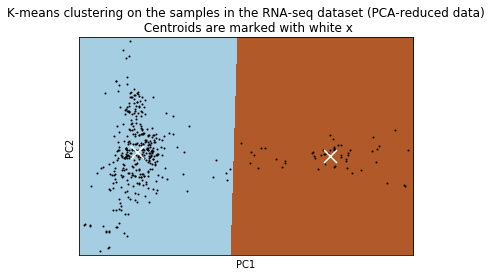

For n_clusters = 2 The average silhouette_score is : 0.7176022968444858


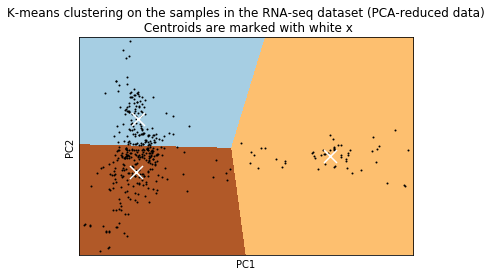

For n_clusters = 3 The average silhouette_score is : 0.44612363767482843


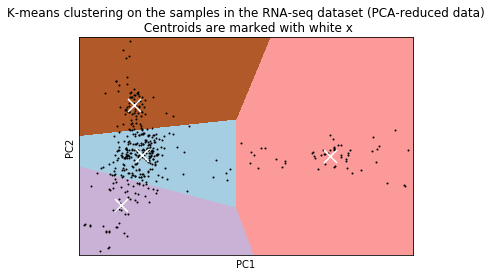

For n_clusters = 4 The average silhouette_score is : 0.48312749914384273


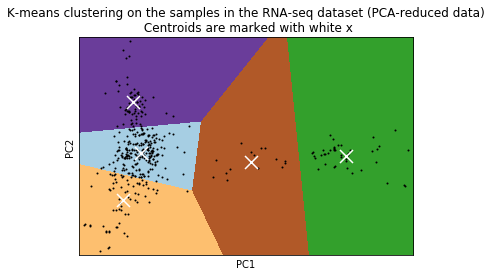

For n_clusters = 5 The average silhouette_score is : 0.48052180991846366


In [24]:
%matplotlib inline

from sklearn.cluster import KMeans

import sys
sys.path.append('/opt/humbio51/helpers')
from kmeans_helpers import * 


## YOUR CODE HERE 
for k in [2,3,4,5]:
    clusters=scikit_kmeans(rnaseq_data_subset.transpose(),
                       k,
                       xlabel='PC1',
                       ylabel='PC2',
                       plottitle='K-means clustering on the samples in the RNA-seq dataset (PCA-reduced data)'
                      )

### Question 3d 
Draw a heatmap of the clustered samples with the optimal value of k from question 3c. 

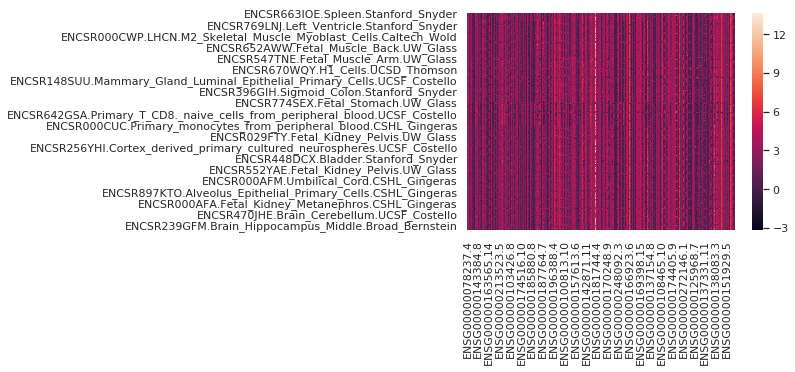

In [25]:
import seaborn as sns 
sns.set(color_codes=False)
#sort the data by the cluster assignment 
data_transpose=rnaseq_data_subset.transpose()
data_transpose['cluster']=clusters
data_transpose=data_transpose.sort_values('cluster')
data_transpose.drop('cluster',axis=1)
g = sns.heatmap(data_transpose)
